# Figure 5: Two-alternative forced-choice decoder demonstrates enhanced stimulus discrimination in the absence of feedback

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statannotations.Annotator import Annotator
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
from utils import *

In [3]:
color_dict = get_color_dict(color_names=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'yellow', 'lightblue'])

# Load data

In [4]:
# CT FB supp. data
data_opto = pd.read_csv('../data/decoder_opto_data.csv').applymap(decode_array)

In [5]:
# Model results
df_performance = pd.read_csv('../data/performance_data.csv')  

# Plots for one example unit

Plot decision matrices:

In [6]:
# Define example key
key = {'m':'Ntsr1Cre_2019_0008', 's': 5, 'e':8, 'u':21}
key_idx = data_opto[(data_opto['m']==key['m']) & (data_opto['s']==key['s']) & (data_opto['e']==key['e']) & (data_opto['u']==key['u'])].index[0]

n_rand_fragments = 20

# Get decision matrices
D_opto_off = data_opto.iloc[key_idx]['D_ctrl']
D_opto_on = data_opto.iloc[key_idx]['D_opto']

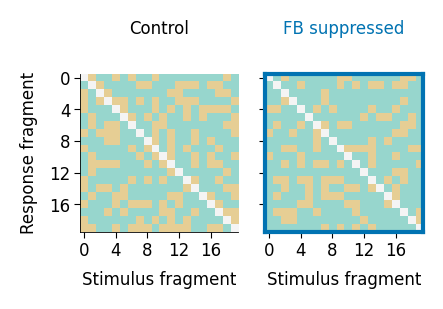

In [7]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(2.1,1.7),
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )

    # Control
    ax = ax_dict['a']
    ax.imshow(D_opto_off[:n_rand_fragments, :n_rand_fragments], cmap='BrBG', vmin=-3, vmax=3)
    ax.set_xticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticks(np.arange(0, n_rand_fragments, 4))
    ax.set_ylabel('Response fragment')
    ax.set_xlabel('Stimulus fragment')
    ax.set_title('Control', y=1.2)

    # CT FB supp.
    ax = ax_dict['b']
    # color
    for spine_loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[spine_loc].set_visible(True)
        ax.spines[spine_loc].set_linewidth(1.5)
        ax.spines[spine_loc].set_color(color_dict['blue'])
    # Plotting
    ax.imshow(D_opto_on[:n_rand_fragments, :n_rand_fragments], cmap='BrBG', vmin=-3, vmax=3)
    ax.set_xticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticks(np.arange(0, n_rand_fragments, 4))
    ax.set_yticklabels([])
    ax.set_ylabel('')
    ax.set_xlabel('Stimulus fragment')
    ax.set_title('FB suppressed', color=color_dict['blue'], y=1.2)

Plot barplot:

In [8]:
# Define example key
key = {'m':'Ntsr1Cre_2019_0008', 's': 5, 'e':8, 'u':21}
key_idx = data_opto[(data_opto['m']==key['m']) & (data_opto['s']==key['s']) & (data_opto['e']==key['e']) & (data_opto['u']==key['u'])].index[0]

# Get decision matrices
n_rand_fragments = 20
D_opto_off = data_opto.iloc[key_idx]['D_ctrl']
D_opto_on = data_opto.iloc[key_idx]['D_opto']
percentages_corr_off = (np.sum(D_opto_off==1, axis=0)/D_opto_off.shape[0])*100
percentages_corr_on = (np.sum(D_opto_on==1, axis=0)/D_opto_on.shape[0])*100

# Build DataFrame for plotting
df_perc_corr = pd.DataFrame(dict(condition=['ctrl']*percentages_corr_off.shape[0]+['opto']*percentages_corr_on.shape[0],
                                percentage_corr=list(np.concatenate([percentages_corr_off, percentages_corr_on]))))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

ctrl vs. opto: Mann-Whitney-Wilcoxon test two-sided, P_val:1.204e-12 U_stat=2.094e+03


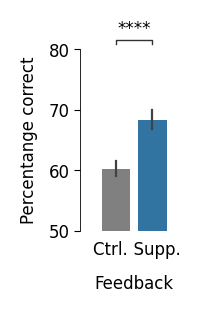

In [9]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(.7,1.2),
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    ax1 = ax_dict['a']
    # Top part of the plot
    sns.barplot(data=df_perc_corr, x='condition', y='percentage_corr', ax=ax1, errwidth=.8, palette=['gray', 'tab:blue'])
    
    ax1.set_xlim([-1, 2])
    ax1.set_xlabel('')
    ax1.set_ylim([50, 80])
    ax1.set_yticks([50, 60, 70, 80])
    ax1.set_ylabel('')
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.tick_params(axis='x', colors='white')
    ax1.set_xticklabels(['Ctrl.  ', '  Supp.'], color='k')
    ax1.set_xlabel('Feedback', labelpad=6)
    ax1.tick_params(axis='both', which='major')
    ax1.set_ylabel('Percentange correct')
    
    # Annotate significance
    annotator = Annotator(ax1, data=df_perc_corr, pairs=[('ctrl', 'opto')], x="condition", y='percentage_corr', order=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', fontsize=6, line_width=.5)
    annotator.apply_and_annotate()
    
    plt.subplots_adjust(wspace=0, hspace=.1)

In [10]:
df_perc_corr.groupby(['condition'])['percentage_corr'].mean()

condition
ctrl    60.27
opto    68.34
Name: percentage_corr, dtype: float64

# Population analysis

In [11]:
# Opto
perc_corr_ctrl = data_opto['perc_corr_ctrl'].values
perc_corr_opto = data_opto['perc_corr_opto'].values
ratios_opto = perc_corr_opto/perc_corr_ctrl

# Modulation indices
omis = df_performance[df_performance['config_name']=='Full model']['omi'].values
rmis = df_performance[df_performance['config_name']=='Full model']['rmi'].values
emis = df_performance[df_performance['config_name']=='Full model']['emi'].values

In [12]:
ylim = [np.min(ratios_opto), np.max(ratios_opto)+.02]
xticks = [.001, .1,1]
yticks = [1, 1.1, 1.2]

### Get significant neurons

In [13]:
pval_opto = df_performance[df_performance['config_name']=='Full model']['perm_pvalue_opto'].values 
signif_opto_idx = np.where([pval_opto<0.001])[1]

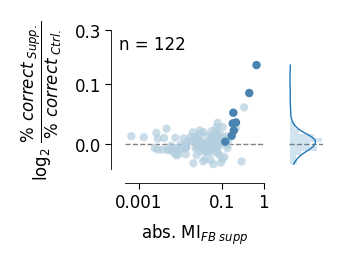

In [14]:
with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    ab
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(1.6,1.2),
        dpi=200,
        constrained_layout=True,
        gridspec_kw={"width_ratios":[1, .25]},
        
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    # CT FB supp.
    ax = ax_dict['a']
    sns.scatterplot(abs(omis), ratios_opto, edgecolor='none', facecolor='#b3cedeff', alpha=.7, ax=ax, zorder=1)
    sns.scatterplot(abs(omis)[signif_opto_idx], ratios_opto[signif_opto_idx], edgecolor='none', facecolor='#4884afff', ax=ax, zorder=2)
    ax.axhline(y=1, linestyle='--', color='gray', zorder=0)
    ax.set_xscale('log', basex=2)
    ax.set_yscale('log', basey=2)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks)
    ax.set_yticks(yticks)
    ax.set_yticklabels(np.round(np.log2(yticks),1))
    ax.set_xlabel('abs. MI$_{FB~supp}$')
    ax.set_ylabel('$\log_2~\dfrac{\%~correct_{~Supp.}}{\%~correct_{~Ctrl.}}$', loc='center')
    sns.despine(offset=5, trim=False, ax=ax)
    ax.tick_params(axis='both', which='major')
    ax.set_title('n = {:d}'.format(omis.shape[0]), y=.8, x=.2)
    
    ax = ax_dict['b']
    sns.histplot(y=ratios_opto, kde=True, edgecolor='none', alpha=.2, ax=ax)
    ax.axhline(y=1, linestyle='--', color='gray', zorder=0)
    ax.set_yscale('log', basey=2)
    ax.set_xlim([-1, ax_dict['b'].get_xlim()[1]])
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_ylim(ax_dict['a'].get_ylim())
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xlabel('')
    sns.despine(offset=5, trim=False, ax=ax, left=True, bottom=True)

# Stats on distribution of ratios

In [15]:
np.mean(ratios_opto)

1.0035055505723345

In [16]:
np.std(ratios_opto)

0.02081140086828938

In [17]:
np.var(ratios_opto, ddof=1)

0.000436693864002294

In [18]:
scipy.stats.skewtest(ratios_opto)

SkewtestResult(statistic=7.5116830460410995, pvalue=5.837197878069364e-14)

# Split ratios by modulation

In [19]:
df_mod_split = pd.DataFrame(dict(ratio=ratios_opto,
                                 omi=omis,
                                 omi_abs=abs(omis),
                                 pval=df_performance[df_performance['config_name']=='Full model']['perm_pvalue_opto'].values,
                                 perf_perm_opto=df_performance[df_performance['config_name']=='Full model']['perm_score_opto_mean'].values,
                                 perf_full_model=df_performance[df_performance['config_name']=='Full model']['r_mean_train'].values,
                                )).sort_values(by=['omi_abs']).reset_index()
df_mod_split['effect_shuffle'] = df_mod_split['perf_full_model']-df_mod_split['perf_perm_opto']

signif05 = []
for h in ((df_mod_split['pval'] <= 0.05)).values:
    if h==False:
        signif05.append('No')
    else:
        signif05.append('Yes')
df_mod_split['signif05'] = signif05
df_mod_split['group'] = (['low']*11 + ['mid']*99 + ['high']*12)

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

No vs. Yes: Mann-Whitney-Wilcoxon test two-sided, P_val:4.353e-05 U_stat=1.840e+02


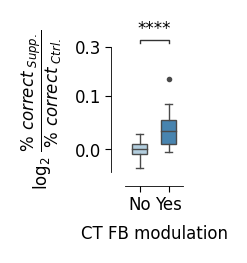

In [20]:
yticks = [1, 1.1, 1.2]
ylim=[.93, 1.2]

with plt.style.context("matplotlib_config.txt"):
    mosaic = """
    a
    """
    fig, ax_dict = plt.subplot_mosaic(
        mosaic,
        figsize=(.9,1.2),
        dpi=200,
        constrained_layout=True,
    )

    txt_kwargs = dict(
        color="black", fontsize="larger"
    )
    
    ax = ax_dict['a']

    sns.boxplot(data=df_mod_split,
               x='signif05',
               y='ratio',
               ax=ax,
               width=.5,
               palette='Blues',
               fliersize=2,
               flierprops={"marker": "."},
               )
    ax.set_xticklabels(['No', 'Yes'])
    ax.set_yscale('log', basey=2)
    ax.set_yticks(yticks)
    ax.set_yticklabels(np.round(np.log2(yticks),1))

    ax.set_xlabel('CT FB modulation')
    ax.set_ylabel('$\log_2~\dfrac{\%~correct_{~Supp.}}{\%~correct_{~Ctrl.}}$', loc='center')
    sns.despine(trim=False, offset=5)

    # Annotate significance
    annotator = Annotator(ax, data=df_mod_split, pairs=[('No', 'Yes')], x="signif05", y='ratio', order=None)
    annotator.configure(test='Mann-Whitney', text_format='star', loc='outside', fontsize=6, line_width=.5)
    annotator.apply_and_annotate()